## Logistic Function / Sigmoid Function

In [1]:
import numpy as np
def sigmoid(z):
    return 1/(1 + np.exp(-z))

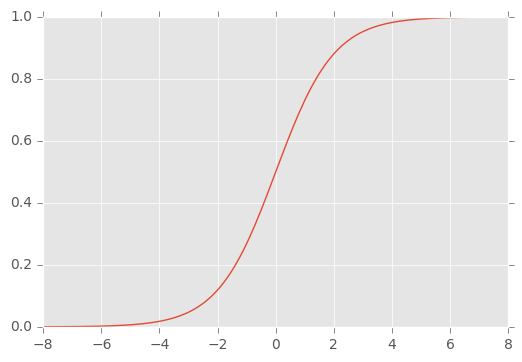

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

z = np.arange(-8,8,0.1)
y = sigmoid(z)
plt.plot(z,y)
plt.show()

## Logistic Regression

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 切分訓練資料與測試資料

In [4]:
from sklearn.cross_validation import train_test_split
X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.head()

,花萼長度,花萼寬度
83,6.0,2.7
119,6.0,2.2
35,5.0,3.2
30,4.8,3.1
87,6.3,2.3


### 標準化（Normalize）參數值

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_nor = sc.transform(X_train)
X_test_nor = sc.transform(X_test)
X_train_nor[:10]

array([[ 0.2592099 , -0.81831962],
       [ 0.2592099 , -2.06720857],
       [-0.98357729,  0.43056933],
       [-1.23213473,  0.18079154],
       [ 0.63204606, -1.81743078],
       [ 1.25343965,  0.43056933],
       [ 0.75632478, -0.56854183],
       [-0.85929857,  1.67945829],
       [-0.98357729,  0.93012492],
       [-0.11362626, -0.56854183]])

### 訓練資料分類效果（使用兩個參數）

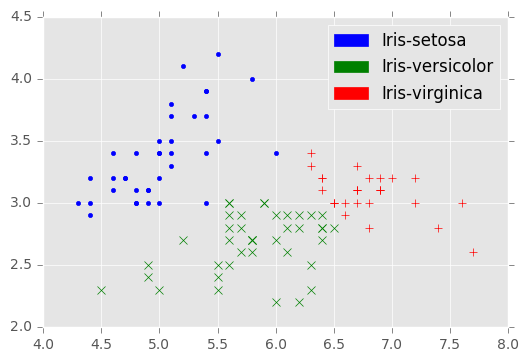

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

lr = LogisticRegression()
lr.fit(X_train_nor, y_train)
pred_y = lr.predict(X_train_nor)

for i in range(len(X_train_nor)):
    if(lr.predict(X_train_nor[i].reshape(1,-1))=='Iris-setosa'):
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(X_train_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(X_train['花萼長度'].reset_index(drop=True)[i],X_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()

### 分類效果測試（使用訓練好的model）

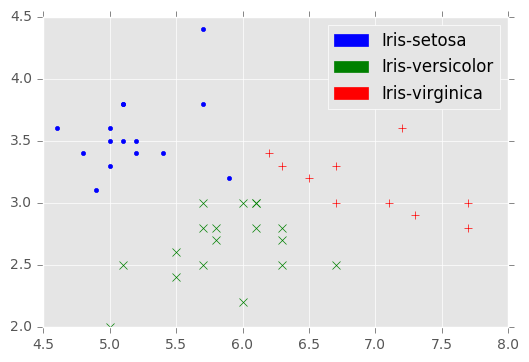

In [7]:
for i in range(len(X_test_nor)):
    if(lr.predict(X_test_nor[i].reshape(1,-1))=='Iris-setosa'):
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(X_test_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(X_test['花萼長度'].reset_index(drop=True)[i],X_test['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])  
plt.show()

### 視覺化混淆矩陣函式（from sklearn官網）

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

### 機率分類判斷

In [9]:
import numpy as np
np.round(lr.predict_proba(X_test_nor),3)

array([[ 0.923,  0.038,  0.039],
       [ 0.872,  0.083,  0.045],
       [ 0.008,  0.431,  0.561],
       [ 0.127,  0.621,  0.252],
       [ 0.828,  0.13 ,  0.042],
       [ 0.002,  0.688,  0.31 ],
       [ 0.083,  0.505,  0.412],
       [ 0.91 ,  0.009,  0.081],
       [ 0.005,  0.124,  0.871],
       [ 0.091,  0.622,  0.287],
       [ 0.001,  0.539,  0.461],
       [ 0.05 ,  0.371,  0.579],
       [ 0.766,  0.196,  0.038],
       [ 0.033,  0.872,  0.095],
       [ 0.923,  0.038,  0.039],
       [ 0.002,  0.398,  0.601],
       [ 0.098,  0.714,  0.188],
       [ 0.347,  0.346,  0.307],
       [ 0.317,  0.248,  0.435],
       [ 0.287,  0.471,  0.242],
       [ 0.01 ,  0.12 ,  0.87 ],
       [ 0.083,  0.505,  0.412],
       [ 0.879,  0.094,  0.027],
       [ 0.008,  0.575,  0.417],
       [ 0.03 ,  0.729,  0.241],
       [ 0.025,  0.175,  0.8  ],
       [ 0.038,  0.31 ,  0.651],
       [ 0.164,  0.323,  0.513],
       [ 0.   ,  0.386,  0.614],
       [ 0.83 ,  0.112,  0.058],
       [ 0

### Evaluation：Confusion Metrics（混淆矩陣）

In [10]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_nor))
print (cnf_matrix)

[[14  0  0]
 [ 1  9  0]
 [ 0  9 12]]


Confusion matrix, without normalization
[[14  0  0]
 [ 1  9  0]
 [ 0  9 12]]


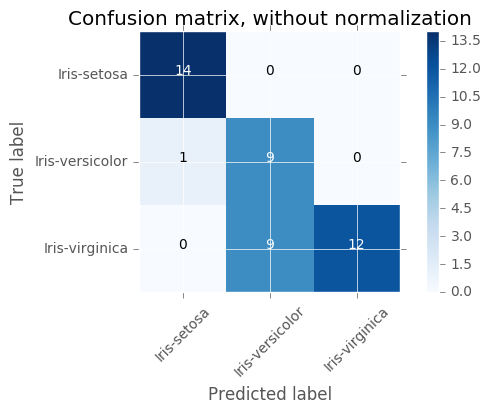

In [11]:
import itertools
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test_nor), target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.97        14
Iris-versicolor       0.50      0.90      0.64        10
 Iris-virginica       1.00      0.57      0.73        21

    avg / total       0.87      0.78      0.78        45

